In [41]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
# Loading Data
customer_data= pd.read_csv('Churn_Modelling_1.csv')

In [43]:
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [50]:
customer_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,649.296800,38.986200,5.032700,76336.868184,1.567600,0.70550,0.515100,99863.064427,0.203700
std,2886.89568,7.193619e+04,104.610733,10.706347,2.958937,62579.647407,1.326124,0.45584,0.499797,57904.108746,0.402769
min,1.00000,1.556570e+07,-722.000000,18.000000,0.000000,-154100.300000,1.000000,0.00000,0.000000,-171364.180000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50825.857500,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97079.410000,1.000000,1.00000,1.000000,100088.080000,0.000000
75%,7500.25000,1.575323e+07,717.250000,44.000000,8.000000,127633.195000,2.000000,1.00000,1.000000,149369.790000,0.000000
max,10000.00000,1.581569e+07,850.000000,118.000000,29.000000,250898.090000,47.000000,1.00000,1.000000,199992.480000,1.000000


In [46]:
# Check Correlation
# CreditScore != -ve  ||  Age !> 90 || Tenure !> 20 (as bank is 20 yrs old) || Balance != -ve || EstimatedSalary != -ve

# Imputation

In [ ]:
customer_data= customer_data['CreditScore'].apply(lambda x: customer_data[customer_data['CreditScore']>0].mean() if x<0 else x) # if CreditScore<0 then replace it with mean of CreditScore

In [ ]:

plt.figure(figsize=(10,6))


In [ ]:
sns.heatmap(customer_data.select_dtypes(include=['number']).corr(), annot= True, cmap= plt.cm.CMRmap_r)   # ----> less correlation between features

# Univariate Analysis

In [ ]:

# sns.histplot(customer_data['CreditScore'])  # -----> Normal Distribution with some outliers
sns.histplot(customer_data['Age'])   # -----> Normal Distribution with some outliers

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>, <Axes: >]],
      dtype=object)

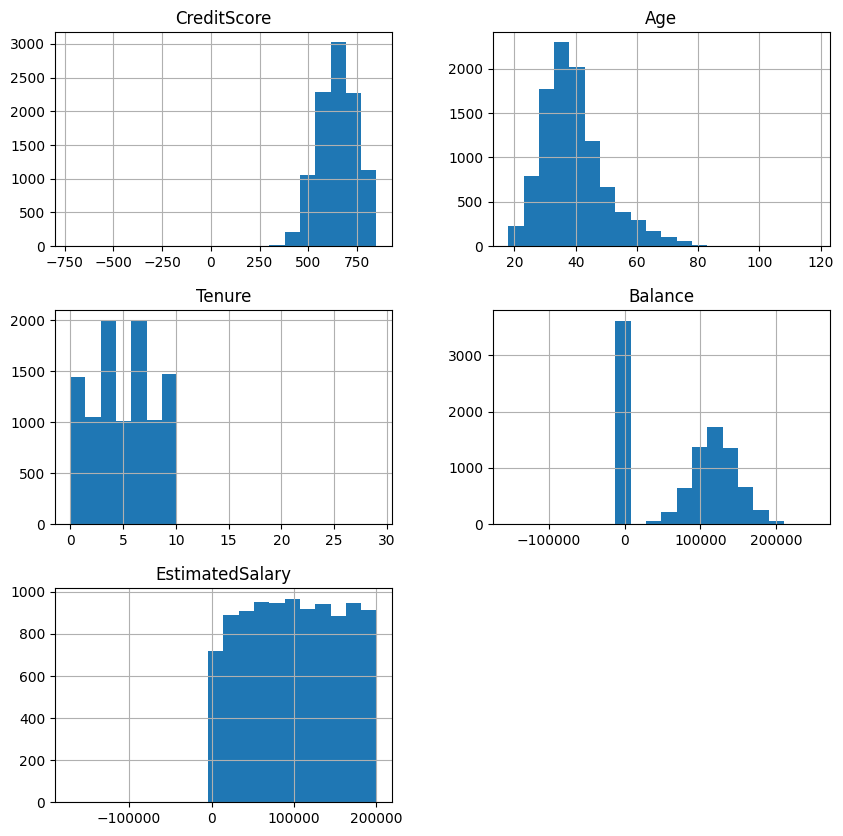

In [49]:
columns_to_include = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
customer_data.hist(column= columns_to_include, figsize= (10,10), bins= 20)

In [18]:
# remove unnecessary columns
dataset= customer_data.drop(['RowNumber','CustomerId','Surname'],axis=1)